# 斯坦福 EE364a 凸优化笔记 - 第二部分：L5-8 对偶理论 

教材: Convex Optimization by Boyd & Vandenberghe 核心目标: 识别、表述并求解凸优化问题。

## Lecture 5: Convex Optimization 
核心内容：
- 标准形式：standard form (convex) optimization problem
- 线性优化：linear optimization
- 二次优化：quadratic optimization
- 几何规划：geometric programming
- 半定优化：semidefinite optimization
- 拟凸优化：quasiconvex optimization
- 向量/多目标优化：vector and multicriterion optimization

这 7 类的共同点：都能归约为“凸可行域 + 凸目标（或拟凸目标）”，因此 局部最优=全局最优，且有系统化数值方法

### 4.1 优化问题标准形式 (Optimization Problem in Standard Form)

#### 标准形式
$$\begin{aligned}
\min_{x} \quad & f_0(x) \\
\text{s.t.} \quad & f_i(x) \leq 0, \quad i = 1, \dots, m \\
& h_i(x) = 0, \quad i = 1, \dots, p
\end{aligned}$$

- $x \in \mathbb{R}^n$：优化变量 (Optimization variable)。、
- $f_0: \mathbb{R}^n \to \mathbb{R}$：目标函数 (Objective function)。
- $f_i(x) \leq 0$：不等式约束 (Inequality constraints)。
- $h_i(x) = 0$：等式约束 (Equality constraints)。

$x$ 为优化变量，$p^*$ 为最优值。如果无解则 $p^{*}=\infty$ (不可行)，如果无下界则 $p^{*}=-\infty$

#### 最优解
- 最优值 (Optimal Value) $p^*$：
$$p^* = \inf \{ f_0(x) \mid f_i(x) \le 0, \; h_i(x) = 0 \}$$
在这个基础上，寻找最优解 (Finding an optimal solution) 等价于寻找满足以下所有条件的 $x$：$$\begin{aligned}
f_i(x) &\le 0, \quad i = 1, \dots, m \quad &(\text{可行性/Feasibility}) \\
h_i(x) &= 0, \quad i = 1, \dots, p \quad &(\text{可行性/Feasibility}) \\
f_0(x) &= p^* \quad &(\text{最优性/Optimality})
\end{aligned}$$

或者用集合论的语言写成最优解集 $X_{\text{opt}}$：$$X_{\text{opt}} = \{ x \in \mathbb{R}^n \mid f_i(x) \le 0, \; h_i(x) = 0, \; f_0(x) = p^* \}$$

Note: Boyd 的《凸优化》）中，使用 $\inf$（Infimum，下确界）而不是 $\min$（Minimum，最小值），是为了严谨性。 “最小值”必须由某个具体的 $x$ 取到，而“下确界”只需要是数值上的逼近极限。



- Locally Optimal
局部最优 (Locally Optimal) 的定义强调的是“邻域”内的比较。它不一定是整个定义域里最好的，但在它周围的一小块区域里是最好的。
设优化问题的可行域 (Feasible Set) 为 $\mathcal{D}$：$$\mathcal{D} = \{ x \in \mathbb{R}^n \mid f_i(x) \le 0, \; h_i(x) = 0 \}$$一个点 $x$ 被称为局部最优解 (Locally Optimal Point)，如果满足以下两个条件：
    - 可行性 (Feasibility)$$x \in \mathcal{D}$$(即 $x$ 必须满足所有约束条件)
    - 局部最优性 (Local Optimality)存在一个半径 $R > 0$，使得对于所有满足距离条件的可行点 $z$，都有 $f_0(x)$ 最小：$$f_0(x) \le f_0(z), \quad \forall z \in \mathcal{D} \text{ satisfying } \|z - x\|_2 \le R$$

- 关键性质: 对于凸问题，任何局部最优解都是全局最优解。

#### 隐式约束 (Implicit constraints)
课件中提到定义域可以有隐式约束

$x\in\mathcal{D}=\bigcap_{i=0}^{m}dom~f_{i}\cap\bigcap_{i=1}^{p}dom~h_{i}$
$\mathcal{D}$ 称为问题的 定义域 (domain)。

约束 $f_{i}(x)\le0$, $h_{i}(x)=0$ 是 显式约束 (explicit constraints)。如果没有显式约束 ($m=p=0$)，则称该问题为 无约束 (unconstrained) 的。
- 例子：

minimize $f_{0}(x)=-\sum_{i=1}^{k}log(b_{i}-a_{i}^{T}x)$这是一个包含隐式约束 $a_{i}^{T}x < b_{i}$ 的无约束问题。

#### 可行性定义(Feasibility)
给定约束函数$f_i:\mathbb{R}^n\to\mathbb{R}$（不等式）与$h_i:\mathbb{R}^n\to\mathbb{R}$（等式），可行性问题是
$$\text{find } x\in\mathbb{R}^n \quad
\text{s.t.}\quad
f_i(x)\le 0,\ i=1,\dots,m,\qquad
h_i(x)=0,\ i=1,\dots,p$$
定义可行域
$$\mathcal{F}\;:=\;\{x\in\mathbb{R}^n \mid f_i(x)\le 0,\ i=1,\dots,m;\ \ h_i(x)=0,\ i=1,\dots,p\}$$

作为优化问题的特例：
$$\begin{aligned}
\min_{x\in\mathbb{R}^n}\quad & 0 \\
\text{s.t.}\quad & f_i(x)\le 0,\ i=1,\dots,m,\\
& h_i(x)=0,\ i=1,\dots,p.
\end{aligned}$$
其最优值（optimal value）按定义是:
$$p^* \;:=\; \inf\{\,0 \mid x\in\mathcal{F}\,\}
\;=\;
\inf_{x\in\mathcal{F}} 0$$

可行/不可行时的 $p^*$
- 若 $F \neq \emptyset$（可行），则
$$
p^* = \inf_{x \in F} 0 = 0.
$$
- 若 $F = \emptyset$（不可行），则
$$
p^* = \inf_{x \in \emptyset} 0 ;=; \inf \emptyset ;=; +\infty.
$$



### 4.2 **Convex optimization problem**
#### 定义
标准形式的凸优化问题:
$$\begin{aligned}
\min_x\;\; & f_0(x)\\
\text{s.t.}\;\; & f_i(x)\le 0,\quad i=1,\dots,m,\\
                & a_i^{T}x = b_i,\quad i=1,\dots,p.
\end{aligned}$$

- $f_0$, $f_1$...$f_m$ 都是凸的，等式约束是 仿射 (affine) 的
- 如果 $f_0$ 是拟凸的 (且 $f_1, ..., f_m$ 是凸的)，则该问题是 拟凸 (quasiconvex) 的。写成
$$\begin{aligned}
\min_x\;\; & f_0(x)\\
\text{s.t.}\;\; & f_i(x)\le 0,\quad i=1,\dots,m,\
& Ax = b.
\end{aligned}$$

- 重要性质: 凸优化问题的可行集是凸集。
---
为什么等式约束一定强调“仿射”？
- 约束 $f_i(x)\le 0$ 在 (f_i) 凸时给出凸集（凸函数的 sublevel set 是凸的）。
- 但等式约束 $g(x)=0$ 一般不会保持凸性，除非 (g) 是仿射。反例：
$x^2 = 1 ;\Rightarrow; x \in {-1, 1}$
这是非凸集合。
- 等式约束就是“线性方程组”.
---

- 例子

minimize $f_{0}(x)=x_{1}^{2}+x_{2}^{2}$

subject to $f_{1}(x)=x_{1}/(1+x_{2}^{2})\le0$, $h_{1}(x)=(x_{1}+x_{2})^{2}=0$

$f_0$ 是凸的；可行集 $\{(x_1, x_2) | x_1 = -x_2 \le 0\}$ 是凸的。 但这 ***不是*** 一个凸问题,$f_1$ 不是凸的，$h_1$ 不是仿射的。

---
先用$h1(x)=0$ 解出 $(x_1+x_2)^2=0 \iff x_1+x_2=0 \iff x_1=-x_2$。
再看$f_1(x) \le 0$
$$1+x_2^2>0 \quad \forall x_2$$
$$\frac{x_1}{1+x_2^2}\le 0 \iff x_1\le 0$$
合并
$$x_1=-x_2,\quad x_1\le 0$$
所以可行集是
$$\mathcal{F}=\{(x_1,x_2)\mid x_1=-x_2\le 0\}= \{(t,-t)\mid t\le 0\}$$

这就是过原点的一条直线上的半射线，显然是凸集（两点连线仍在半射线上）。

再看$f_1$是否为凸： 算Hessian矩阵是本办法，用Boyd上节课的降维射线判定法
> 如果 $f(x)$ 是凸的，那么它沿任何一条直线的限制函数也必须凸。
即 $g(t) = f(x_0 + t v)$ 必须对 $t$ 凸。

选一条最简单的直线：固定 $x_1 = 1$，令 $x_2 = t$。则
$$g(1) = \tfrac{1}{2}, \quad g(-1) = \tfrac{1}{2}, \quad g(0) = 1.$$

用中点凸性检验：中点是 $0$，但$g(0) = 1 \not\le \dfrac{g(1) + g(-1)}{2} = \tfrac{1}{2}.$ 显然不凸

---


####  可微函数最优性准则

$x$ 是最优的当且仅当对于所有可行解 $y$ 有 $\nabla f_{0}(x)^{T}(y-x)\ge0$。

如果非零，$\nabla f_0(x)$ 定义了可行集 $X$ 在 $x$ 处的一个支撑超平面。

**数学解释**：

凸函数满足
$$f_0(y)\ \ge\ f_0(x)+\nabla f_0(x)^T (y-x)\quad(\forall x,y)$$
如果在某个点 𝑥 上还满足
$$\nabla f_0(x)^T(y-x)\ge 0\quad(\forall y\in X)$$
那么对所有可行$y\in X$:
$$f_0(y)\ge f_0(x)+\underbrace{\nabla f_0(x)^T(y-x)}_{\ge 0}\ \ge\ f_0(x)$$
$x$ 就是全局最小点

**几何解释**：
> 对凸、可微的 $f(x)$, 在凸可行集 𝑋上最小化时，最优点 𝑥 的梯度$\nabla f_0(x)$ 必须“朝着把你推出可行域的方向”，使得你在可行域里找不到任何能让目标下降的方向。

数学公式 $\nabla f_{0}(x)^{T}(y-x) \ge 0$ 是两个向量的内积
- 向量 A：$\nabla f_0(x)$（地形原本的上坡方向）。
- 向量 B：$y - x$（尝试迈步的方向）
由内积意义，如果内积 $\ge 0$意味着迈步的方向 ($y-x$) 和上坡方向 ($\nabla f_0$) 大致相同。
- 结论： 因为 $x$ 已经是最小值了，所以所有可行的迈步方向 ($y-x$) 都必须是“上坡”的。所以内积必须 $\ge 0$。

**支撑超平面**

定义超平面（通过点 $x$，法向量是 $\nabla f_0(x)$）：
$$
H = \{\, z \mid \nabla f_0(x)^T (z - x) = 0 \,\}.
$$

最优性准则要求
$$
\nabla f_0(x)^T (y - x) \ge 0,\quad \forall y \in X
$$
等价于：
$$
X \subseteq \{\, z \mid \nabla f_0(x)^T (z - x) \ge 0 \,\}.
$$

也就是：整个可行集 $X$ 都落在某一个半空间里；这个半空间的“边界”就是超平面 $H$；并且 $x \in X \cap H$（因为取 $y = x$ 等号成立）。这正是 “$H$ 在 $x$ 处支撑 $X$” 的定义：一张平面贴住集合 $X$ 的边界，集合完全在平面的一侧。

直觉：$\nabla f_0(x)$ 指向“如果想往 $-\nabla f_0(x)$ 走（最陡下降方向）就会立刻离开可行集”的方向。所以可行集在 $x$ 处有一个“挡板”，这个挡板就是支撑超平面。

---
例子：
$x\in\mathbb{R}^2,\ \min \|x\|^2 \ \text{s.t.}\ x_1 \ge 1.$

最优点是 $x^* = (1,0)$。梯度 $\nabla f(x)=2x$，所以 $\nabla f(x^*) = (2,0)$。

支撑超平面：
$$
(2,0)^T\bigl((z_1,z_2)-(1,0)\bigr)=0 \;\Longleftrightarrow\; z_1=1.
$$

可行集是半平面 $z_1 \ge 1$，确实完全在直线$x_1 = 1$的一侧，而且直线在 $x^*$ 处“贴住”它。

---

**特例**
- 无约束问题: $x$ 是最优的当且仅当:$x\in dom~f_{0}$, $\nabla f_{0}(x)=0$

- 等式约束问题: minimize $f_0(x)$ subject to $Ax=b$ $x$ 是最优的当且仅当存在 $v$ 使得:$x\in dom~f_{0}, Ax=b, \nabla f_{0}(x)+A^{T}\nu=0$
    - 数学解释： 梯度对所有可行方向都正交
    ---
    对等式约束，可行集 $X = \{x \mid Ax = b\}$ 是仿射集（凸）。从可行点 $x$ 出发，能保持可行的方向 $d$ 必须满足：
    $$
    A(x + t d) = b \;\Rightarrow\; A x + t\,A d = b \;\Rightarrow\; A d = 0.
    $$
    所以可行方向集合是
    $$
    T_X(x) = \{\, d \mid A d = 0 \} = \mathrm{Null}(A).
    $$

    “一阶必要条件”写成方向形式：
    $$
    \nabla f(x)^T d \ge 0,\quad \forall d \in \mathrm{Null}(A).
    $$
    但 $\mathrm{Null}(A)$ 是子空间，若对 $d$ 成立也必须对 $-d$ 成立，于是只能是
    $$
    \nabla f(x)^T d = 0,\quad \forall d \in \mathrm{Null}(A).
    $$

    这等价于线代结论：
    $$
    \nabla f(x) \in \mathrm{Null}(A)^\perp = \mathrm{Range}(A^T).
    $$
    因此存在 $\nu$ 使得
    $$
    \nabla f(x) = -A^T \nu \;\Longleftrightarrow\; \nabla f(x) + A^T \nu = 0.
    $$

    也就是说梯度对所有可行方向都正交

    --- 

    - 几何解释：在等式约束 $Ax = b$ 上只能沿切向方向移动（$A d = 0$），最优点要求“沿切向一阶不能下降（first-order necessary condition, FONC）”，所以 $\nabla f(x^*)$ 必须完全指向法向空间（$\mathrm{Range}(A^T)$），这等价于存在 $\nu$ 使
$$
\nabla f(x^*) + A^T \nu = 0.
$$


- 非负象限上的最小化: minimize $f_0(x)$ subject to $x \ge 0$， $x$ 是最优的当且仅当:$x \in dom f_0, x \ge 0$, 且满足 $$\begin{cases} \nabla f_0(x)_i \ge 0 & x_i=0 \\ \nabla f_0(x)_i = 0 & x_i > 0 \end{cases}$$
    - 几何解释：如果最小值在内部，那么梯度为0，说明已经在开阔的地带了；如果最小值在边界，则梯度>0, 说明函数还有增长的趋势，梯度必须>0 此来阻止我们往右边移动（因为往右边走函数值会更大）。



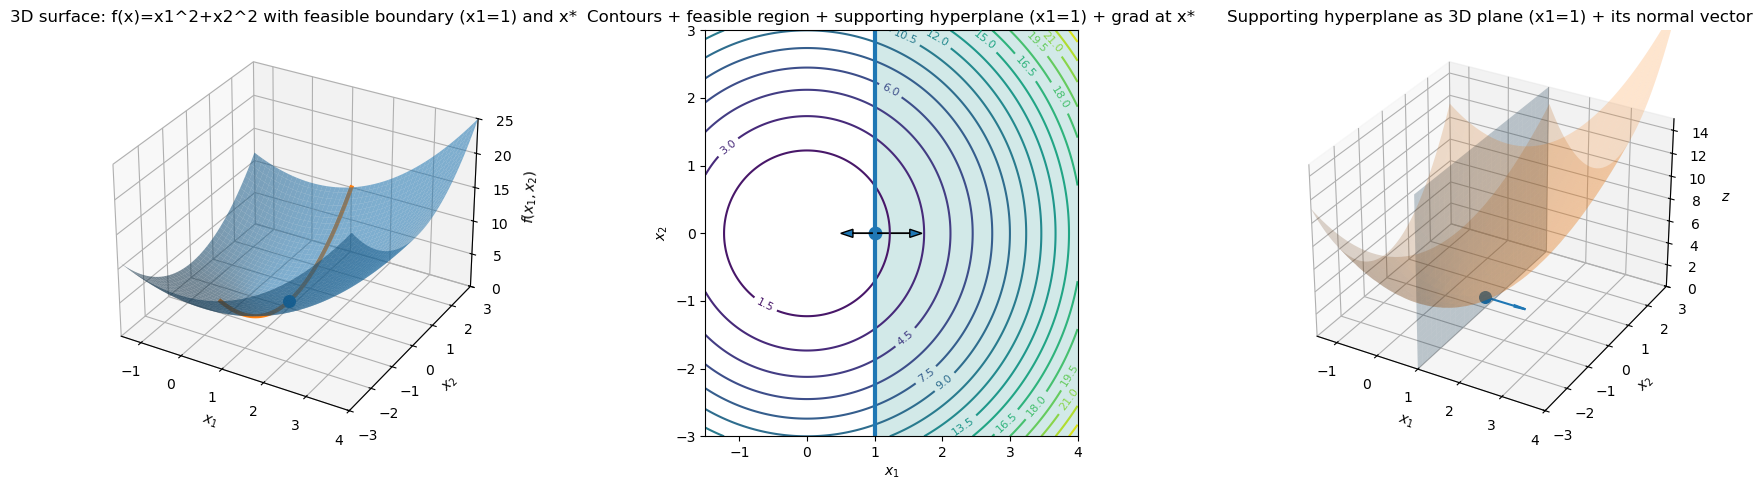

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

def f(x1, x2):
    return x1**2 + x2**2

x_star = np.array([1.0, 0.0])
grad = np.array([2 * x_star[0], 2 * x_star[1]])
x1 = np.linspace(-1.5, 4.0, 200)
x2 = np.linspace(-3.0, 3.0, 200)
X1, X2 = np.meshgrid(x1, x2)
Z = f(X1, X2)
feasible = X1 >= 1.0
z_star = f(x_star[0], x_star[1])

fig = plt.figure(figsize=(18, 5))

# Col 1: 3D surface + boundary + x*
ax1 = fig.add_subplot(1, 3, 1, projection="3d")
ax1.plot_surface(X1, X2, Z, alpha=0.55, rstride=4, cstride=4, linewidth=0)
x2_line = np.linspace(-3.0, 3.0, 200)
x1_line = np.ones_like(x2_line)
z_line = f(x1_line, x2_line)
ax1.plot(x1_line, x2_line, z_line, linewidth=3)
ax1.scatter([x_star[0]], [x_star[1]], [z_star], s=70)
ax1.set_xlabel("$x_1$"); ax1.set_ylabel("$x_2$"); ax1.set_zlabel("$f(x_1,x_2)$")
ax1.set_title("3D surface: f(x)=x1^2+x2^2 with feasible boundary (x1=1) and x*")
ax1.set_xlim(-1.5, 4.0); ax1.set_ylim(-3.0, 3.0); ax1.set_zlim(0.0, np.max(Z))

# Col 2: Contour + feasible + supporting line + grad
ax2 = fig.add_subplot(1, 3, 2)
cs = ax2.contour(X1, X2, Z, levels=18)
ax2.clabel(cs, inline=True, fontsize=8)
ax2.contourf(X1, X2, feasible.astype(float), levels=[0.5, 1.5], alpha=0.2)
ax2.plot(np.ones_like(x2), x2, linewidth=3)
ax2.scatter([x_star[0]], [x_star[1]], s=80)
ax2.arrow(x_star[0], x_star[1], grad[0]*0.35, grad[1]*0.35,
          head_width=0.12, head_length=0.18, length_includes_head=True)
ax2.arrow(x_star[0], x_star[1], -grad[0]*0.25, -grad[1]*0.25,
          head_width=0.12, head_length=0.18, length_includes_head=True)
ax2.set_xlabel("$x_1$"); ax2.set_ylabel("$x_2$")
ax2.set_title("Contours + feasible region + supporting hyperplane (x1=1) + grad at x*")
ax2.set_xlim(-1.5, 4.0); ax2.set_ylim(-3.0, 3.0); ax2.set_aspect("equal", adjustable="box")

# Col 3: 3D plane x1=1 + normal
ax3 = fig.add_subplot(1, 3, 3, projection="3d")
x2p = np.linspace(-3.0, 3.0, 30)
zp = np.linspace(0.0, np.max(Z)*0.6, 30)
X2p, Zp = np.meshgrid(x2p, zp)
X1p = np.ones_like(X2p)
ax3.plot_surface(X1p, X2p, Zp, alpha=0.25, rstride=1, cstride=1, linewidth=0)
ax3.plot_surface(X1, X2, Z, alpha=0.20, rstride=8, cstride=8, linewidth=0)
ax3.scatter([x_star[0]], [x_star[1]], [z_star], s=70)
n3 = np.array([1.0, 0.0, 0.0])
ax3.quiver(x_star[0], x_star[1], z_star, n3[0], n3[1], n3[2], length=1.0, normalize=True)
ax3.set_xlabel("$x_1$"); ax3.set_ylabel("$x_2$"); ax3.set_zlabel("$z$")
ax3.set_title("Supporting hyperplane as 3D plane (x1=1) + its normal vector")
ax3.set_xlim(-1.5, 4.0); ax3.set_ylim(-3.0, 3.0); ax3.set_zlim(0.0, np.max(Z)*0.6)

plt.tight_layout()
plt.show()


A = [[1. 2.]]
b = [1.5]
x* = [0.3 0.6]
nu = [-0.6]
Primal residual ||Ax*-b|| = 0.0
Stationarity residual ||grad f(x*) + A^T nu|| = 0.0

Decomposition of grad f(x*) into normal + tangent parts:
grad = [0.6 1.2]
proj onto span(A^T) = [0.6 1.2]
tangent component (should be ~0) = [0. 0.]
||tangent component|| = 0.0

Check orthogonality with feasible direction d (Ad=0):
A d = [0.]
grad^T d = 0.0


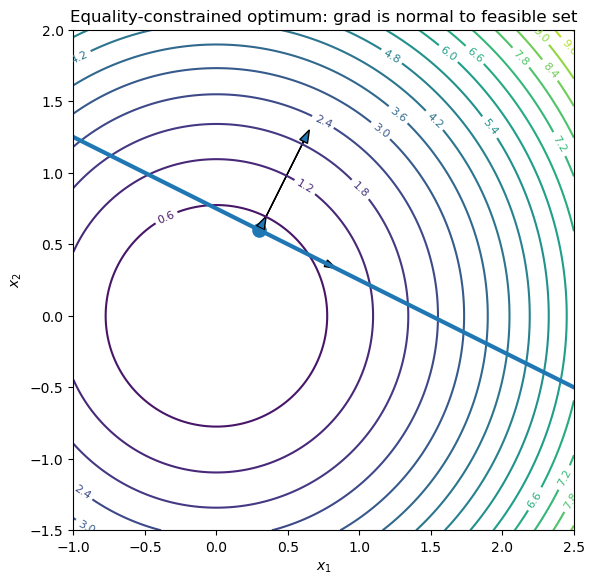

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# =========================
# Example: minimize f(x)=||x||^2  subject to  A x = b
# =========================
A = np.array([[1.0, 2.0]])   # shape (1,2)
b = np.array([1.5])          # shape (1,)

# Objective: f(x) = x1^2 + x2^2, grad f(x) = 2x
def f(x):
    return x[0]**2 + x[1]**2

def grad_f(x):
    return 2.0 * x

# --- Solve via KKT analytically ---
# KKT: 2x + A^T nu = 0,  Ax=b
AA_T = A @ A.T
nu = -2.0 * np.linalg.solve(AA_T, b)     # (1,)
x_star = A.T @ np.linalg.solve(AA_T, b)  # (2,)

# --- Verify KKT residuals ---
r_primal = A @ x_star - b
r_stationarity = grad_f(x_star) + A.T @ nu

print("A =", A)
print("b =", b)
print("x* =", x_star)
print("nu =", nu)
print("Primal residual ||Ax*-b|| =", float(np.linalg.norm(r_primal)))
print("Stationarity residual ||grad f(x*) + A^T nu|| =", float(np.linalg.norm(r_stationarity)))

# --- Show that grad is in Range(A^T) ---
g = grad_f(x_star)
aT = A.T[:, 0]  # normal direction
proj_g = aT * (aT @ g) / (aT @ aT)
orth_g = g - proj_g
print("\nDecomposition of grad f(x*) into normal + tangent parts:")
print("grad =", g)
print("proj onto span(A^T) =", proj_g)
print("tangent component (should be ~0) =", orth_g)
print("||tangent component|| =", float(np.linalg.norm(orth_g)))

# A direction in Null(A) (tangent direction): d=[2,-1] since [1,2]·[2,-1]=0
d = np.array([2.0, -1.0])
print("\nCheck orthogonality with feasible direction d (Ad=0):")
print("A d =", A @ d)
print("grad^T d =", float(g @ d))

# =========================
# Plot: contour of f + feasible line + x* + grad and normal
# =========================
x1 = np.linspace(-1.0, 2.5, 400)
x2 = np.linspace(-1.5, 2.0, 400)
X1, X2 = np.meshgrid(x1, x2)
Z = X1**2 + X2**2

fig, ax = plt.subplots(figsize=(7.5, 6.5))
cs = ax.contour(X1, X2, Z, levels=18)
ax.clabel(cs, inline=True, fontsize=8)

# Feasible line: x1 + 2 x2 = 1.5
x2_line = (b[0] - A[0,0]*x1) / A[0,1]
ax.plot(x1, x2_line, linewidth=3)

# Mark x*
ax.scatter([x_star[0]], [x_star[1]], s=90)

# Arrows: A^T (normal), grad f(x*), and a tangent feasible direction d
scale = 0.35
ax.arrow(x_star[0], x_star[1], aT[0]*scale, aT[1]*scale,
         head_width=0.06, head_length=0.09, length_includes_head=True)
ax.arrow(x_star[0], x_star[1], g[0]*0.08, g[1]*0.08,
         head_width=0.06, head_length=0.09, length_includes_head=True)

d_unit = d / np.linalg.norm(d)
ax.arrow(x_star[0], x_star[1], d_unit[0]*0.6, d_unit[1]*0.6,
         head_width=0.05, head_length=0.08, length_includes_head=True)

ax.set_aspect("equal", adjustable="box")
ax.set_xlim(-1.0, 2.5)
ax.set_ylim(-1.5, 2.0)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_title("Equality-constrained optimum: grad is normal to feasible set")
plt.show()



#### 等价变换   
通过保持凸性的变换，可以将问题转化为等价形式，
- 消除等式约束: 用 $x = Fz + x_0$ 替代，将问题转化为无约束或仅含不等式约束的问题 
- 引入松弛变量: 将线性不等式 $a_i^T x \le b_i$ 转化为等式 $a_i^T x + s_i = b_i$ 和非负约束 $s_i \ge 0$
- Epigraph 形式: 引入变量 $t$，最小化 $t$ 使得 $f_0(x) - t \le 0$。这可以将目标函数转化为线性的。

##### 消除等式约束 (Eliminating equality constraints)
原理:如果优化问题中包含等式约束 $Ax = b$，我们可以利用线性代数的知识将其消除。任何满足 $Ax=b$ 的解 $x$ 都可以表示为：$$x = Fz + x_0$$

其中：
- $x_0$ 是 $Ax=b$ 的任意一个特解（particular solution）。
- $F$ 是一个矩阵，其列向量张成了 $A$ 的零空间（nullspace），即 $AF=0$。
- $z$ 是新的优化变量，维度比 $x$ 低（$z \in \mathbb{R}^{n-p}$，假设 $A \in \mathbb{R}^{p \times n}$）。

通过将 $x$ 替换为 $Fz + x_0$，我们可以消除等式约束，得到一个关于 $z$ 的等价问题：$$  \begin{aligned}
  & \text{minimize} && f_0(Fz + x_0) \\
  & \text{subject to} && f_i(Fz + x_0) \le 0, \quad i=1, \dots, m
  \end{aligned}$$
这个新问题没有等式约束，且变量更少

---

**举例**

原问题:$$  \begin{aligned}
  & \text{minimize} && x_1^2 + x_2^2 \\
  & \text{subject to} && x_1 + x_2 = 1
  \end{aligned}$$

消除过程:
- 找到特解 $x_0$: 取 $x_0 = [0.5, 0.5]^T$（满足 $0.5+0.5=1$）。
- 找到零空间矩阵 $F$: 方程 $x_1 + x_2 = 0$ 的解形如 $x_1 = -x_2$。取 $F = [1, -1]^T$。
- 代换: $x = Fz + x_0 \Rightarrow \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} = z \begin{bmatrix} 1 \\ -1 \end{bmatrix} + \begin{bmatrix} 0.5 \\ 0.5 \end{bmatrix} = \begin{bmatrix} 0.5+z \\ 0.5-z \end{bmatrix}$。新问题（无约束!!!）:

$$\text{minimize} \quad (0.5+z)^2 + (0.5-z)^2$$

这个不就是平时的用的方法么？只不过Boyd把它上升到通用理论高度

---

##### 引入松弛变量 (Introducing slack variables)
**原理**: 对于仿射不等式约束 $a_i^T x \le b_i$，我们可以引入一个非负的辅助变量 $s_i$（称为松弛变量），将不等式转化为等式：$$a_i^T x + s_i = b_i, \quad s_i \ge 0$$

这个变换通常用于将一般形式的线性规划转化为标准形式（Standard Form，通常要求所有约束为等式和非负约束）。

转化后的问题:
$$  \begin{aligned}
  & \text{minimize} && f_0(x) \\
  & \text{subject to} && a_i^T x + s_i = b_i, \quad i=1, \dots, m \\
  & && s_i \ge 0, \quad i=1, \dots, m
  \end{aligned}$$

---
举例: 
原问题: $$\text{minimize} \quad c^T x \quad \text{subject to} \quad 2x_1 + 3x_2 \le 10$$

引入松弛变量后的等价问题:
$$  \begin{aligned}
  & \text{minimize} && c^T x \\
  & \text{subject to} && 2x_1 + 3x_2 + s_1 = 10 \\
  & && s_1 \ge 0
  \end{aligned}$$

这里 $s_1$ 代表了资源（$10$）未被使用的剩余量（slack）。

---

#### Epigraph 形式 (Epigraph form)
**原理**:Epigraph（上方图）形式可以将非线性的目标函数转化到约束中，从而使目标函数变为线性的。引入一个新的标量变量 $t$，并要求 $t$ 大于等于原目标函数值：$$f_0(x) \le t$$

原问题:$$\text{minimize} \quad f_0(x) \quad \text{subject to} \quad f_i(x) \le 0, \quad Ax=b$$

Epigraph 形式问题:

$$  \begin{aligned}
  & \text{minimize (over } x, t \text{)} && t \\
  & \text{subject to} && f_0(x) - t \le 0 \\
  & && f_i(x) \le 0, \quad i=1, \dots, m \\
  & && Ax = b
  \end{aligned}$$

---
**举例**:
原问题（最小化范数）:$$\text{minimize} \quad \|Ax - b\|_2$$这是一个非线性（但在凸优化中很常见）的目标函数。Epigraph 形式:$$  \begin{aligned}
  & \text{minimize} && t \\
  & \text{subject to} && \|Ax - b\|_2 \le t
  \end{aligned}$$这等价于一个二阶锥规划（SOCP）约束。这种形式使得目标函数变成简单的线性函数 $t$。


这里的 $t$ 正是用来构建和表示目标函数 $f_0(x)$ 的上方图 (Epigraph)。  
函数 $f: \mathbb{R}^n \rightarrow \mathbb{R}$ 的上方图定义为：$$\text{epi } f = \{(x, t) \in \mathbb{R}^{n+1} \mid x \in \text{dom } f, f(x) \le t\}$$

在上面的等价公式中，约束条件 $f_0(x) - t \le 0$ 等价于 $f_0(x) \le t$。这意味着优化变量 $(x, t)$ 被限制在目标函数 $f_0$ 的上方图中。

--- 


### 4.3 拟凸优化 (Quasiconvex Optimization)
#### 定义与性质

一个标准的拟凸优化问题形式：$$\begin{aligned}
& \text{minimize} && f_0(x) \\
& \text{subject to} && f_i(x) \le 0, \quad i=1, \dots, m \\
& && Ax = b
\end{aligned}$$

其中：
- 目标函数 $f_0$ 是 拟凸函数 (quasiconvex)
- 不等式约束 $f_1, \dots, f_m$ 仍然必须是 凸函数 (convex)
- 等式约束 是仿射的 

**重要**：虽然约束集是凸集，但由于目标函数不是凸函数（只是拟凸），局部最优解不一定是全局最优解

#### 通过凸可行性问题求解 (Solution via Convex Feasibility Problems)

拟凸优化的核心求解思路是利用其 子水平集 (Sublevel sets) 的性质，将优化问题转化为一系列的 凸可行性问题 (Convex Feasibility Problems)。

*为什么需要转化？*： 拟凸函数 $f_0(x)$ 本身可能不是凸函数（例如呈钟形曲线或分式形式），直接对其进行最小化比较困难。但是，拟凸优化的一个关键性质是：它的 下水平集是凸集。 如果我们能找到一种方法，把“检查 $f_0(x) \le t$ 是否有解”这个问题，转化为“检查一个凸不等式 $\phi_t(x) \le 0$ 是否有解”，我们就可以利用凸优化了。

如果 $f_0$ 是拟凸的，那么它的 $t$-子水平集 $S_t = \{x \mid f_0(x) \le t\}$ 是凸集。通常我们可以找到一族凸函数 $\phi_t(x)$ 来表示这些子水平集，满足：$$f_0(x) \le t \iff \phi_t(x) \le 0$$其中 $\phi_t(x)$ 关于 $x$ 是凸的。

---

例子：

对于分式函数 $f_0(x) = \frac{p(x)}{q(x)}$，其中 $p$ 是凸函数，$q$ 是凹函数，且 $p(x) \ge 0, q(x) > 0$。我们可以取 $\phi_t(x) = p(x) - t q(x)$。显然，对于固定的 $t \ge 0$，$\phi_t(x)$ 是凸函数（因为它是凸函数 $p$ 和凸函数 $-tq$ 的和）

这使得我们能够使用二分法：固定 $t$，解凸可行性问题 $\phi_t(x) \le 0$ 5。如果可行，说明最优值 $p^* \le t$，尝试更小的 $t$；否则尝试更大的 $t$ 6。

--- 

#### 求解方法：二分法 (Bisection Method)

利用上述性质，我们可以通过检查最优值 $p^*$ 是否小于等于某个值 $t$，来逼近最优解。这等价于检查以下集合是否非空（即是否可行）：
$$\begin{aligned}
& \phi_t(x) \le 0 \\
& f_i(x) \le 0, \quad i=1, \dots, m \\
& Ax = b
\end{aligned}$$
这是一个标准的 凸可行性问题 

**算法步骤** ：给定已知包含最优值 $p^*$ 的区间 $[l, u]$ 和容差 $\epsilon$：
- 更新中点：令 $t = (l + u) / 2$
- 求解可行性：求解上述凸可行性问题 
- 更新区间：
    - 如果可行（说明存在 $x$ 使得 $f_0(x) \le t$），则最优值 $p^* \le t$，令 $u := t$ 
    - 如果不可行，则 $p^* > t$，令 $l := t$ 12。
- 循环：直到区间长度 $u - l \le \epsilon$

- 复杂度：该方法需要的迭代次数为 $\lceil \log_2((u-l)/\epsilon) \rceil$。每次迭代都需要求解一个凸可行性问题

这一段的意思应该是把一个不一定有全局最优解的问题 转化找下水平集中最低的那个点。search 的办法也就自然而然转化成二分法



### 4.4 线性规划 (Linear Programming, LP)
#### 标准形式
$$\begin{aligned}
& \text{minimize} && c^T x + d \\
& \text{subject to} && Gx \le h \\
& && Ax = b
\end{aligned}$$

- 目标函数与约束：目标函数 $c^T x + d$ 和约束函数（$Gx - h$ 及 $Ax - b$）全部都是 仿射函数 (Affine functions) 
    - 注意：虽然常数项 $d$ 不影响最优解 $x^*$ 的位置，但它包含在标准定义中。
- 几何意义：可行集是有限个半空间（由 $Gx \le h$ 定义）和超平面（由 $Ax = b$ 定义）的交集。因此，线性规划的可行集是一个 多面体 (Polyhedron)
- 凸性：因为多面体是凸集，且目标函数是凸的（既是凸又是凹），所以 LP 是一个凸优化问题。

#### 应用实例
Boyd重点介绍了三个将实际问题转化为线性规划的经典例子。
- 饮食问题 (Diet Problem)这是一个经典的运筹学问题，目的是以最低成本满足营养需求。
    - 问题描述：
        - 有 $n$ 种食物，我们要决定每种食物的购买量 $x_j$。
        - 每单位食物 $j$ 的成本是 $c_j$。
        - 每单位食物 $j$ 包含营养成分 $i$ 的量为 $a_{ij}$。
        - 我们要保证营养成分 $i$ 的总摄入量至少为 $b_i$ 3。
    - LP 建模：$$  \begin{aligned}
    & \text{minimize} && c^T x \\
    & \text{subject to} && Ax \ge b \\
    & && x \ge 0
    \end{aligned}$$
    - 目标：最小化总花费 $c^T x$
    - 约束：$Ax \ge b$ 表示所有营养成分都达标；$x \ge 0$ 表示食物数量不能为负
    - **例子**

      - 2 种食物：燕麦 (Oatmeal)、鸡蛋 (Eggs)。
      - 2 种营养素：蛋白质 (Protein)、维生素 A (Vitamin A)。
      - 目标：满足每日营养需求，且花费最少。

      <table>
        <thead>
          <tr>
            <th>Item (variable)</th>
            <th>Cost $c_j$</th>
            <th>Protein $a_{1j}$</th>
            <th>Vitamin A $a_{2j}$</th>
          </tr>
        </thead>
        <tbody>
          <tr>
            <td>Oats $x_1$</td>
            <td>0.3$/serving</td>
            <td>5 g</td>
            <td>10 IU</td>
          </tr>
          <tr>
            <td>Eggs $x_2$</td>
            <td>1.0$/serving</td>
            <td>6 g</td>
            <td>270 IU</td>
          </tr>
          <tr>
            <td>Daily requirement $b_i$</td>
            <td>—</td>
            <td>min 20 g</td>
            <td>500 IU</td>
          </tr>
        </tbody>
      </table>

      只要写对约束，就可以用 cvxpy 来算了。


- 分段线性最小化 (Piecewise-linear Minimization)
   
   很多优化问题的目标函数是由多个线性函数的最大值构成的，这种函数虽然不是线性的，但是是凸的，可以转化为 LP。
   - 原问题：$$\text{minimize} \quad f(x) = \max_{i=1,\dots,m} (a_i^T x + b_i)$$ .这里 $f(x)$ 是分段线性的凸函数。
   - LP 转化 (Epigraph 技巧)： 引入辅助变量 $t$，原问题等价于找到最小的 $t$，使得 $f(x) \le t$。 即：
   $$  \begin{aligned}
    & \text{minimize} && t \\
    & \text{subject to} && a_i^T x + b_i \le t, \quad i=1, \dots, m
    \end{aligned}$$
   
   ---
   **例子**

   最小化以下目标函数：$$f(x) = \max(y_1(x), y_2(x), y_3(x))$$
   其中y1, y2, y3 由 3 条直线组成：
   - $y_1 = 2x + 10$
   - $y_2 = -3x + 10$
   - $y_3 = 0.5x + 2$
   - 根据 Epigraph 技巧，我们引入变量 $t$，问题转化为：
    $$\begin{aligned}
    & \text{minimize} && t \\
    & \text{subject to} && 2x + 10 \le t \\
    & && -3x + 10 \le t \\
    & && 0.5x + 2 \le t
    \end{aligned}$$

    - 我们需要将不等式整理为 $A_{ub} [x, t]^T \le b_{ub}$ 的形式：
        - $2x - t \le -10$
        - $-3x - t \le -10$
        - $0.5x - t \le -2$
    - 然后用cvxpy 或者scipy.optimize.linprog
   ---


- 切比雪夫中心 (Chebyshev Center)
   
  这是一个几何问题，寻找一个多面体内能容纳的最大的球（即最大内切球）。![chebyshev_](./image/chebyshev_center_of_a_polyhedron.png)
  
  - 问题定义：给定多面体 $\mathcal{P} = \{x \mid a_i^T x \le b_i, i=1,\dots,m\}$。我们要找一个球 $\mathcal{B} = \{x_c + u \mid \|u\|_2 \le r\}$，使得 $\mathcal{B} \subseteq \mathcal{P}$，且半径 $r$ 最大
    - $x_c$ 是球心
    - $r$ 是半径
    - $u$ 是相对于中心 $x_c$ 的“位移向量”或“偏移量” (Displacement vector)。
  - 约束转化：
    球 $\mathcal{B}$ 在多面体 $\mathcal{P}$ 内部，意味着球内的每一个点都必须满足多面体的所有不等式约束。
    
    对于每一个约束 $a_i^T x \le b_i$，球内最“危险”（最容易违反该约束）的点是球心沿着法向量 $a_i$ 方向延伸 $r$ 处的点。
    
    数学推导如下：
  $$  \begin{aligned}
  & \forall x \in \mathcal{B}, a_i^T x \le b_i \\
  \iff & \sup \{a_i^T (x_c + u) \mid \|u\|_2 \le r\} \le b_i \\
  \iff & a_i^T x_c + \sup \{a_i^T u \mid \|u\|_2 \le r\} \le b_i \\
  \iff & a_i^T x_c + r \|a_i\|_2 \le b_i
  \end{aligned}$$
  
    这里利用了性质：根据柯西-施瓦茨不等式（Cauchy-Schwarz inequality），当 $u$ 的方向与 $a_i$ 相同时，$a_i^T u$ 取得最大值. 也就是向量 $u$ 在方向 $a_i$ 上的最大投影长度是 $\|u\|_2 \|a_i\|_2 = r \|a_i\|_2$。
  - LP 建模：通过上述推导，我们将“球在多面体内”这个几何约束转化为了关于变量 $x_c$ 和 $r$ 的线性不等式。
  
  $$  \begin{aligned}
  & \text{maximize} && r \\
  & \text{subject to} && a_i^T x_c + r \|a_i\|_2 \le b_i, \quad i=1, \dots, m
  \end{aligned}$$
  
  ==> 转化为标准线性规划问题

  - **NOTE**
    $$a_i^T x_c + r \|a_i\|_2 \le b_i, \quad i=1, \dots, m$$
    - $m$ 是不等式约束的数量（多面体有 $m$ 个面）。
    - $a_i^T$ 是矩阵 $A$ 的第 $i$ 行（代表第 $i$ 个面的法向量）。
    - 每个面的法向量 $a_i$ 的长度（$\|a_i\|_2$）可能是不一样的。所以要分别计算 $r \|a_1\|_2$, $r \|a_2\|_2$, ..., $r \|a_m\|_2$, 而不是算一个matrix $A$的2范数。 x + 4y = 20 法向量是[1, 4] 2范数是$\sqrt{17}$

In [20]:
import cvxpy as cp
import numpy as np

# 1. Define data
n = 2  # number of foods
m = 2  # number of nutrients

c = np.array([0.3, 1.0])       # cost
A = np.array([[5, 6],          # protein
              [10, 270]])       # vitamin A
b = np.array([20, 500])        # requirements

# 2. Define optimization variable
x = cp.Variable(n)

# 3. Define objective function (minimize c^T x)
objective = cp.Minimize(c @ x)

# 4. Define constraints (Ax >= b, x >= 0)
constraints = [
    A @ x >= b,
    x >= 0
]

# 5. Build and solve the problem
prob = cp.Problem(objective, constraints)
prob.solve()

# 6. Print results
print("\n--- CVXPY solution ---")
print(f"Status: {prob.status}")
print(f"Minimum cost: {prob.value:.2f}$")
print(f"Purchase plan: oats {x.value[0]:.2f} servings, eggs {x.value[1]:.2f} servings")


--- CVXPY solution ---
Status: optimal
Minimum cost: 2.34$
Purchase plan: oats 1.86 servings, eggs 1.78 servings


--- SciPy result ---
Optimal solution x*: -0.0000
Minimum value f(x*): 10.0000
Status: Optimization terminated successfully. (HiGHS Status 7: Optimal)


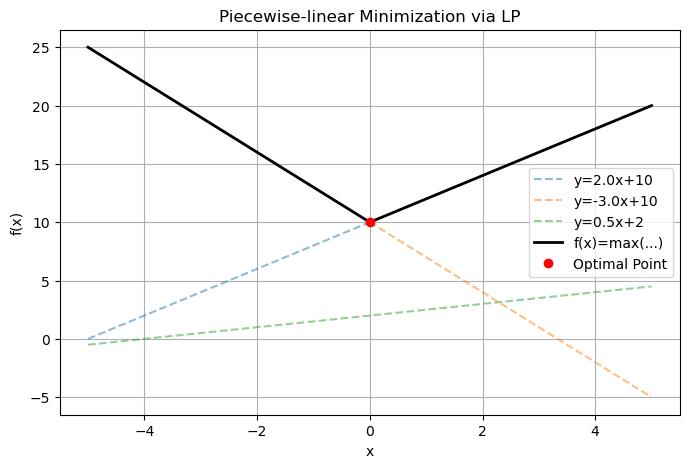

In [21]:
import numpy as np
from scipy.optimize import linprog
import matplotlib.pyplot as plt

# --- 1. Define parameters ---
# We have 3 lines: a_i * x + b_i
# f(x) = max(2x+10, -3x+10, 0.5x+2)
slopes = np.array([2, -3, 0.5])   # a_i
intercepts = np.array([10, 10, 2]) # b_i

# --- 2. Build the LP matrices ---
# Optimization variable vector: z = [x, t]
# Objective: minimize t -> c = [0, 1] (since the coefficient of x is 0 and the coefficient of t is 1)
# Objective = c dot z = [c_x, c_t] dot [x, t].T  = c_x * x + c_t * t
# but we want to minimize t, and x doesn't directly impact object so set c_x = 0
c = np.array([0, 1])

# Constraints: a_i * x + b_i <= t  ==>  a_i * x - t <= -b_i
# Build A_ub: first column is slopes (coefficient of x), second column is -1 (coefficient of t)
n_constraints = len(slopes)
A_ub = np.column_stack((slopes, -np.ones(n_constraints)))

# Build b_ub: -intercepts
b_ub = -intercepts

# Variable bounds: both x and t can be negative (None means -inf to +inf)
bounds = [(None, None), (None, None)]

# --- 3. Solve the LP ---
result = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=bounds, method='highs')

if result.success:
    x_opt = result.x[0]
    t_opt = result.x[1]
    print(f"--- SciPy result ---")
    print(f"Optimal solution x*: {x_opt:.4f}")
    print(f"Minimum value f(x*): {t_opt:.4f}")
    print(f"Status: {result.message}")
else:
    print("Solve failed")

# --- 4. Visualization for validation (1D only) ---
x_vals = np.linspace(-5, 5, 100)
y_vals = np.max([m * x_vals + b for m, b in zip(slopes, intercepts)], axis=0)

plt.figure(figsize=(8, 5))
# Plot each individual line
for m, b in zip(slopes, intercepts):
    plt.plot(x_vals, m * x_vals + b, '--', alpha=0.5, label=f'y={m}x+{b}')

# Plot the max function (piecewise-linear function)
plt.plot(x_vals, y_vals, 'k-', linewidth=2, label='f(x)=max(...)')
# Plot the optimal solution
plt.plot(x_opt, t_opt, 'ro', label='Optimal Point')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Piecewise-linear Minimization via LP')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
import cvxpy as cp
import numpy as np

# Same problem as the SciPy LP example:
#   minimize    t
#   subject to  a_i * x + b_i <= t   for all i
# This is the epigraph formulation of minimizing max_i(a_i x + b_i).


slopes = np.array([2, -3, 0.5])
intercepts = np.array([10, 10, 2])

x = cp.Variable()  # scalar
t = cp.Variable()  # scalar

constraints = [m * x + b <= t for m, b in zip(slopes, intercepts)]
objective = cp.Minimize(t)
prob = cp.Problem(objective, constraints)

prob.solve()  # you can also specify a solver, e.g. solver=cp.ECOS

print("--- CVXPY result ---")
print(f"Optimal x*: {x.value:.4f}")
print(f"Minimum value f(x*): {t.value:.4f}")
print(f"Status: {prob.status}")



--- CVXPY result ---
Optimal x*: 0.0000
Minimum value f(x*): 10.0000
Status: optimal


Maximum radius r: 1.9098
Optimal center xc: [1.90983006 1.90983006]


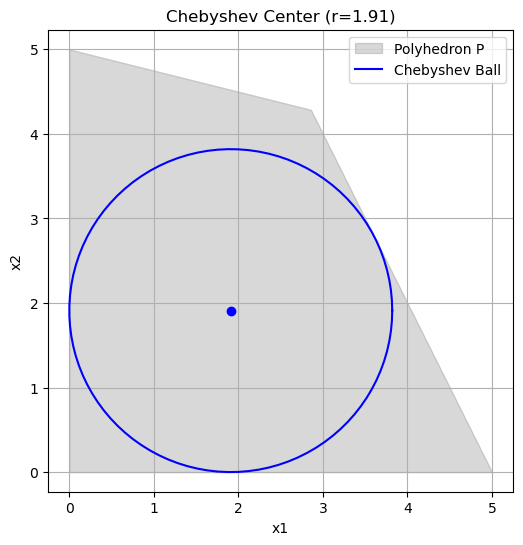

In [23]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Define the polyhedron P = {x | Ax <= b} ---
# Define a simple closed polygon (e.g., an irregular quadrilateral)
# Each row of A is a_i^T
A = np.array([
    [ 2,  1],  #  2x +  y <= 10
    [ 1,  4],  #   x + 4y <= 20
    [-1,  0],  #  -x      <= 0  (i.e., x >= 0)
    [ 0, -1]   #      -y  <= 0  (i.e., y >= 0)
])
b = np.array([10, 20, 0, 0])

m, n = A.shape

# --- 2. Model and solve with CVXPY ---
# Variables: center xc (n-vector) and radius r (scalar)
r = cp.Variable(name="radius")
xc = cp.Variable(n, name="center")

# Objective: maximize radius r
objective = cp.Maximize(r)

# Constraints: a_i^T xc + r * ||a_i||_2 <= b_i
constraints = []
for i in range(m):
    # np.linalg.norm computes the L2 norm ||a_i||_2
    constraints.append(A[i] @ xc + r * np.linalg.norm(A[i]) <= b[i])

# Implicit constraint r >= 0
constraints.append(r >= 0)

# Solve
prob = cp.Problem(objective, constraints)
prob.solve()

# --- 3. Print results ---
print(f"Maximum radius r: {r.value:.4f}")
print(f"Optimal center xc: {xc.value}")

# --- 4. Visualization (2D only) ---
# Plot polyhedron boundary
x_vals = np.linspace(-1, 6, 400)
# Boundary lines from constraints: a*x + b*y = c  =>  y = (c - a*x) / b
y1 = (10 - 2*x_vals) / 1
y2 = (20 - 1*x_vals) / 4
y3 = np.zeros_like(x_vals)  # boundary for x >= 0 is the y-axis; we visualize via the filled region
y4 = np.zeros_like(x_vals)  # boundary for y >= 0 is the x-axis

plt.figure(figsize=(6, 6))

# Fill the feasible polyhedron region (simple visualization; a robust method would compute vertices)
y_min = np.maximum(0, 0)  # y >= 0
y_max = np.minimum(y1, y2)  # upper constraints
plt.fill_between(
    x_vals,
    y_min,
    y_max,
    where=(x_vals >= 0) & (y_max >= y_min),
    color='gray',
    alpha=0.3,
    label='Polyhedron P',
)

# Plot the Chebyshev ball (circle)
theta = np.linspace(0, 2 * np.pi, 100)
circle_x = xc.value[0] + r.value * np.cos(theta)
circle_y = xc.value[1] + r.value * np.sin(theta)
plt.plot(circle_x, circle_y, 'b-', label='Chebyshev Ball')
plt.plot(xc.value[0], xc.value[1], 'bo')  # center

plt.xlim(-1, 6)
plt.ylim(-1, 6)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title(f'Chebyshev Center (r={r.value:.2f})')
plt.grid(True)
plt.axis('equal')  # ensure the circle looks like a circle
plt.show()


### 4.5 二次规划 (Quadratic Programming, QP)
#### 定义
$$\begin{aligned}
& \text{minimize} && (1/2)x^T P x + q^T x + r \\
& \text{subject to} && Gx \le h \\
& && Ax = b
\end{aligned}$$

- 条件：$P \in S_+^n$ (半正定矩阵)，这保证了目标函数是凸函数。
- 几何意义：在一个多面体（由线性不等式和等式定义）上最小化一个凸二次曲面

![QP](./image/QP.png)
- 在最优解 $x^\star$ 处，下降最快的方向（箭头方向）必须指向可行集的外部（或者正交于边界.
- 对应的数学公式是凸优化的一阶最优性条件：$\nabla f_0(x^\star)^T (y - x^\star) \ge 0 \quad \forall y \in \mathcal{P}$
    - $y - x^\star$：代表从最优解 $x^\star$ 指向可行集内部任意一点 $y$ 的向量
    - $\nabla f_0(x^\star)$：是梯度（负梯度的反方向，指向左下方）
    - 图的意思就是说 x 还可以向箭头指的方向走去进一步下降函数值，但是已经在可行性边界上，不能再走了。--> 达到最小值

#### 举例
- 最小二乘 (Least-squares)
    - 形式：$\text{minimize} \quad \|Ax - b\|_2^2 = x^T(A^T A)x - 2b^T A x + b^T b$。
    - 解析解：$x^* = A^{\dagger}b$ （其中 $A^{\dagger}$ 是伪逆）。 $A^{\dagger} = (A^T A)^{-1} A^T$
    - 约束扩展：标准的 QP 求解器允许我们为最小二乘问题添加线性约束，例如上下界限制 $l \le x \le u$，这使得它比单纯的解析解更灵活
- 随机成本的线性规划 (LP with random cost)
    - 背景：假设我们想做一个线性规划 $\text{minimize } c^T x$，但成本向量 $c$ 是不确定的（随机变量）。
    - 假设：$c$ 的均值为 $\bar{c}$，协方差矩阵为 $\Sigma$。因此，总成本 $c^T x$ 也是一个随机变量，其均值为 $\bar{c}^T x$，方差为 $x^T \Sigma x$。
    - QP 建模：
        $$  \begin{aligned}
        & \text{minimize} && \bar{c}^T x + \gamma x^T \Sigma x \\
        & \text{subject to} && Gx \le h, \quad Ax = b
        \end{aligned}$$
        - 这里实际上是在最小化：期望成本 + $\gamma \times$ 风险（方差）。
        - $\gamma > 0$ 是 风险厌恶参数 (risk aversion parameter)，用于控制期望收益与风险之间的权衡

#### 二次约束二次规划 (QCQP)
QCQP 是 QP 的扩展，允许约束条件中也包含二次项。

**形式**：
$$  \begin{aligned}
  & \text{minimize} && (1/2)x^T P_0 x + q_0^T x + r_0 \\
  & \text{subject to} && (1/2)x^T P_i x + q_i^T x + r_i \le 0, \quad i=1, \dots, m \\
  & && Ax = b
  \end{aligned}$$

**凸性条件**：所有矩阵 $P_0, P_1, \dots, P_m$ 必须是半正定的 ($P_i \in S_+^n$)。

**几何意义**：如果 $P_i$ 是正定的，那么每一个不等式约束定义了一个椭球。QCQP 的可行域是 $m$ 个椭球与一个仿射集的交集

#### 二阶锥规划 (SOCP, Second-Order Cone Programming)

**形式**：
$$  \begin{aligned}
  & \text{minimize} && f^T x \\
  & \text{subject to} && \|A_i x + b_i\|_2 \le c_i^T x + d_i, \quad i=1, \dots, m \\
  & && Fx = g
  \end{aligned}$$

二阶锥约束 (SOC constraint)：不等式 $\|A_i x + b_i\|_2 \le c_i^T x + d_i$ 要求向量 $(A_i x + b_i, c_i^T x + d_i)$ 位于 $\mathbb{R}^{n_i+1}$ 空间的二阶锥中。

包含关系：如果 $n_i=0$ (即 $A_i=0, b_i=0$)，这退化为线性规划 (LP)。如果 $c_i=0$，这退化为 QCQP

##### 鲁棒线性规划 (Robust LP)
Boyd给出给的经典例子，说明为什么我们需要 SOCP。

###### 场景I：不确定的约束

假设我们想做一个简单的线性规划：$$\text{minimize } c^T x \quad \text{subject to } a_i^T x \le b_i$$
但是，参数 $a_i$ 不是固定的，它有误差。我们假设 $a_i$ 在一个椭球范围内波动：
$$a_i \in \mathcal{E}_i = \{\bar{a}_i + P_i u \mid \|u\|_2 \le 1\}$$
- $\bar{a}_i$: 名义值（中心）。
- $P_i$: 描述不确定性形状的矩阵。
- $u$: 扰动向量。

**目标**：最坏情况也要满足约束 ==> 我们要求对于椭球内所有可能的 $a_i$，约束都必须成立：$$\sup_{a_i \in \mathcal{E}_i} a_i^T x \le b_i$$

推导 SOCP 形式:

让我们把左边的 $\sup$ 展开：
$$\begin{aligned}
\sup_{\|u\|_2 \le 1} (\bar{a}_i + P_i u)^T x 
&= \bar{a}_i^T x + \sup_{\|u\|_2 \le 1} (u^T P_i^T x) \\
&= \bar{a}_i^T x + \|P_i^T x\|_2
\end{aligned}$$

于是，约束条件变成了：
$$\bar{a}_i^T x + \|P_i^T x\|_2 \le b_i$$
移项整理：$$\|P_i^T x\|_2 \le b_i - \bar{a}_i^T x$$

==> 得到SOCP。对应标准形式 $\|A_i x + b_i\|_2 \le c_i^T x + d_i$：
- $A_i \rightarrow P_i^T$
- $b_i \rightarrow 0$
- $c_i \rightarrow -\bar{a}_i$
- $d_i \rightarrow b_i$

**总结**：原本的线性规划因为参数 $a_i$ 带有椭球不确定性，使得约束条件从“平面的”线性约束变成了一个“弯曲的”二阶锥约束。这展示了 SOCP 比 LP 具有更强的表达能力，能处理不确定性。

In [24]:
import cvxpy as cp
import numpy as np

# 1. Define data
n = 2
c = np.array([-1, -1])  # objective: maximize x1 + x2

# Constraint: a^T x <= b
# Nominal parameter: bar_a
bar_a = np.array([1, 2]) 
b = 10

# Uncertainty matrix P (assume a can vary within a radius-0.5 ball around bar_a)
# P = 0.5 * I
P = np.array([[0.5, 0], 
              [0, 0.5]])

# 2. Define variables
x = cp.Variable(n)

# --- Method A: standard LP (ignore uncertainty) ---
# Constraint: bar_a^T x <= b
prob_lp = cp.Problem(cp.Minimize(c @ x), 
                     [bar_a @ x <= b, x >= 0])
prob_lp.solve()
print(f"Standard LP solution: x = {x.value}, objective value = {prob_lp.value:.4f}")

# --- Method B: robust LP (converted to SOCP) ---
# Constraint: bar_a^T x + ||P^T x||_2 <= b
# This is an SOCP constraint
constraint_robust = (bar_a @ x + cp.norm(P.T @ x, 2) <= b)

prob_socp = cp.Problem(cp.Minimize(c @ x), 
                       [constraint_robust, x >= 0])
prob_socp.solve()
print(f"Robust SOCP solution: x = {x.value}, objective value = {prob_socp.value:.4f}")

Standard LP solution: x = [1.00000000e+01 4.69510125e-10], objective value = -10.0000
Robust SOCP solution: x = [6.66666666e+00 3.24410311e-09], objective value = -6.6667


- 普通 LP 会给出一个比较激进的解，它贴在名义约束边界上。

- 鲁棒 SOCP 会给出一个更保守的解（目标值绝对值更小）。因为它必须退后一步，留出“安全边际” ($\|P^T x\|_2$)，以防止 $a$ 发生波动时违反约束。

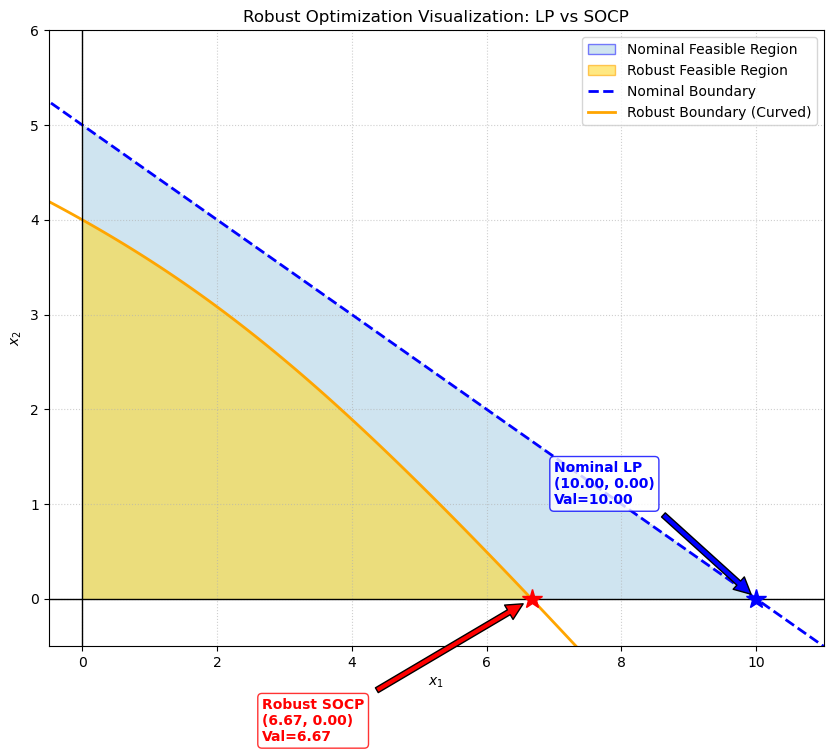

In [25]:
# use scipy to solve LP and SOCP and plot
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog, minimize
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

# 1. Define Data
# Objective: Maximize x1 + x2 (Equivalent to Minimize -x1 - x2)
c = np.array([-1, -1]) 
# Constraint parameters: a^T x <= b
bar_a = np.array([1, 2])
b = 10
# Variables non-negative
x_bounds = [(0, None), (0, None)]

# 2. Solve Nominal LP
# minimize c^T x s.t. bar_a^T x <= b
# HiGHS (High Performance Optimization Software)
res_lp = linprog(c, A_ub=[bar_a], b_ub=[b], bounds=x_bounds, method='highs')
x_lp = res_lp.x

# 3. Solve Robust LP (SOCP)
# Constraint: bar_a^T x + 0.5 * ||x||_2 <= b

def objective(x):
    return -x[0] - x[1]

def constraint(x):
    # Constraint function >= 0
    # 10 - (x1 + 2x2 + 0.5 * sqrt(x1^2 + x2^2)) >= 0
    val = b - (x[0] + 2*x[1] + 0.5 * np.sqrt(x[0]**2 + x[1]**2))
    return val

cons = {'type': 'ineq', 'fun': constraint}
x0 = [0, 0] # Initial guess
res_socp = minimize(objective, x0, method='SLSQP', bounds=x_bounds, constraints=cons)
x_socp = res_socp.x

# 4. Visualization
plt.figure(figsize=(10, 8))

# Create meshgrid
x1_range = np.linspace(-1, 12, 400)
x2_range = np.linspace(-1, 7, 400)
X1, X2 = np.meshgrid(x1_range, x2_range)

# Calculate constraint function values
# Nominal: x1 + 2x2 - 10 <= 0
Z_nominal = X1 + 2*X2 - 10
# Robust: x1 + 2x2 + 0.5*sqrt(x1^2 + x2^2) - 10 <= 0
# ||P x|| = 0.5 * ||x||_2 (assuming P = 0.5 * I)
Z_robust = (X1 + 2*X2) + 0.5 * np.sqrt(X1**2 + X2**2) - 10

# Plot feasible regions (using contourf)
# Mask to show only x >= 0 part
mask = (X1 >= 0) & (X2 >= 0)
Z_nominal_masked = np.where(mask, Z_nominal, np.nan)
Z_robust_masked = np.where(mask, Z_robust, np.nan)

# Plot Nominal LP feasible region (Light Blue)
plt.contourf(X1, X2, Z_nominal_masked, levels=[-100, 0], colors=['#A0CBE2'], alpha=0.5)
# Plot Robust LP feasible region (Orange)
plt.contourf(X1, X2, Z_robust_masked, levels=[-100, 0], colors=['#FFD92F'], alpha=0.6)

# Plot constraint boundaries
plt.contour(X1, X2, Z_nominal, levels=[0], colors='blue', linewidths=2, linestyles='--')
plt.contour(X1, X2, Z_robust, levels=[0], colors='orange', linewidths=2)

# Plot axes
plt.axvline(0, color='black', linewidth=1)
plt.axhline(0, color='black', linewidth=1)

# Plot optimal points
plt.plot(x_lp[0], x_lp[1], 'b*', markersize=15, zorder=10, label='Nominal LP Optimal')
plt.plot(x_socp[0], x_socp[1], 'r*', markersize=15, zorder=10, label='Robust SOCP Optimal')

# Add annotations
plt.annotate(f'Nominal LP\n({x_lp[0]:.2f}, {x_lp[1]:.2f})\nVal={-res_lp.fun:.2f}',
             xy=(x_lp[0], x_lp[1]), xytext=(x_lp[0]-3, x_lp[1]+1),
             arrowprops=dict(facecolor='blue', shrink=0.05),
             fontsize=10, color='blue', fontweight='bold',
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="blue", alpha=0.8))

plt.annotate(f'Robust SOCP\n({x_socp[0]:.2f}, {x_socp[1]:.2f})\nVal={-res_socp.fun:.2f}',
             xy=(x_socp[0], x_socp[1]), xytext=(x_socp[0]-4, x_socp[1]-1.5),
             arrowprops=dict(facecolor='red', shrink=0.05),
             fontsize=10, color='red', fontweight='bold',
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="red", alpha=0.8))

# Legend settings
legend_elements = [
    Patch(facecolor='#A0CBE2', edgecolor='blue', alpha=0.5, label='Nominal Feasible Region'),
    Patch(facecolor='#FFD92F', edgecolor='orange', alpha=0.6, label='Robust Feasible Region'),
    Line2D([0], [0], color='blue', linestyle='--', linewidth=2, label='Nominal Boundary'),
    Line2D([0], [0], color='orange', linestyle='-', linewidth=2, label='Robust Boundary (Curved)')
]

plt.legend(handles=legend_elements, loc='upper right')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Robust Optimization Visualization: LP vs SOCP')
plt.xlim(-0.5, 11)
plt.ylim(-0.5, 6)
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

###### 场景II：概率约束 - 随机模型 (Stochastic Approach)
- 假设：$a_i$ 是服从高斯分布的随机变量，$a_i \sim \mathcal{N}(\bar{a}_i, \Sigma_i)$。

- 目标：约束成立的概率至少为 $\eta$（例如 95%）。
$$\text{prob}(a_i^T x \le b_i) \ge \eta$$

- SOCP 转化：$a_i^T x$ 也是高斯变量，均值为 $\bar{a}_i^T x$，方差为 $x^T \Sigma_i x$。根据高斯分布的累积分布函数 (CDF) $\Phi$，该概率约束等价于：$$\bar{a}_i^T x + \Phi^{-1}(\eta) \|\Sigma_i^{1/2} x\|_2 \le b_i$$只要 $\eta \ge 0.5$（即 $\Phi^{-1}(\eta) \ge 0$），这就是一个二阶锥约束。这意味着，通过 SOCP，我们可以保证线性规划在参数随机波动下的可靠性

**推导**

要保证 $u \le b_i$ 发生的概率至少是 $\eta$（比如 95%）：$$\text{Prob}(u \le b_i) \ge \eta$$
为了计算这个概率，我们需要把 $u$ 变成标准正态分布

将不等式两边同时标准化：$$\text{Prob}\left( \frac{u - \bar{a}_i^T x}{\sigma_u} \le \frac{b_i - \bar{a}_i^T x}{\sigma_u} \right) \ge \eta$$
因为左边变成了标准正态变量 $Z$
公式变为：$$\text{Prob}\left( Z \le \frac{b_i - \bar{a}_i^T x}{\|\Sigma_i^{1/2} x\|_2} \right) \ge \eta$$

用CDF，上面的公式其实就是：$$\Phi \left( \frac{b_i - \bar{a}_i^T x}{\|\Sigma_i^{1/2} x\|_2} \right) \ge \eta$$

现在要把$x$提出来，在两边同时取逆函数 $\Phi^{-1}$（相当于查正态分布表的逆操作）：$$\frac{b_i - \bar{a}_i^T x}{\|\Sigma_i^{1/2} x\|_2} \ge \Phi^{-1}(\eta)$$

如果要求 95% 的可靠性 ($\eta=0.95$)，查表可知 $\Phi^{-1}(0.95) \approx 1.645$。

最后，把分母乘过去，移项整理：$$b_i - \bar{a}_i^T x \ge \Phi^{-1}(\eta) \|\Sigma_i^{1/2} x\|_2$$

再把 $\bar{a}_i^T x$ 移到右边：$$\bar{a}_i^T x + \Phi^{-1}(\eta) \|\Sigma_i^{1/2} x\|_2 \le b_i$$ --> Boyd课件的公式

**直观物理意义**

$$\underbrace{\bar{a}_i^T x}_{\text{名义预测值}} + \underbrace{\Phi^{-1}(\eta)}_{\text{安全系数}} \cdot \underbrace{\|\Sigma_i^{1/2} x\|_2}_{\text{波动大小(标准差)}} \le b_i$$

为了保证在 95% 的情况下都不超标，我们不能只看平均情况 ($\bar{a}_i^T x$)，我们必须还要加上几倍的标准差作为安全缓冲 (Safety Margin)。
- 如果 $\eta=0.5$：$\Phi^{-1}(0.5) = 0$。这意味着我们只关心平均值，完全忽略风险。公式退化为普通线性规划。
- 如果 $\eta=0.95$：$\Phi^{-1}(0.95) \approx 1.645$。我们要留出 1.645 倍标准差的缓冲空间。这就是为什么它是一个二阶锥约束：它由“线性部分”加上“范数部分（风险项）”组成。



### 4.6 几何规划 (Geometric Programming, GP)
几何规划本身不是凸优化问题，但它可以经过一个特定的变量代换转化为凸优化问题。它在工程设计中非常有用。
#### 定义
- 单项式 (Monomial): 形式为 $f(x) = c x_1^{a_1} x_2^{a_2} \dots x_n^{a_n}$ 的函数，其中系数 $c > 0$，指数 $a_i \in \mathbb{R}$。定义域为 $x \in \mathbb{R}_{++}^n$（所有变量必须严格为正
- 正项式 (Posynomial): 单项式的和，即 $f(x) = \sum_{k=1}^K c_k x_1^{a_{1k}} \dots x_n^{a_{nk}}$，其中 $c_k > 0$

#### 标准形式 (Standard Form)
标准的几何规划问题定义： 

$$\begin{aligned}
& \text{minimize} && f_0(x) \\
& \text{subject to} && f_i(x) \le 1, \quad i=1, \dots, m \\
& && h_i(x) = 1, \quad i=1, \dots, p
\end{aligned}$$
- 目标函数 $f_0$ 和 不等式约束 $f_i$ 必须是 正项式 (Posynomial)。
- 等式约束 $h_i$ 必须是 单项式 (Monomial)。
- 注意：约束右边必须是 1。

#### 凸化过程 (Convex Formulation)
GP 的凸化通过以下两步完成
- 变量代换：令 $y_i = \log x_i$，则 $x_i = e^{y_i}$。
- 取对数：对目标函数和约束函数取对数。
    - 单项式的转化：$$f(x) = c x_1^{a_1} \dots x_n^{a_n} \implies \log f(e^y) = a^T y + b \quad (\text{其中 } b = \log c)$$单项式取对数后变成了仿射函数。
    - 正项式的转化：$$f(x) = \sum c_k x^{a_k} \implies \log f(e^y) = \log \left( \sum_{k=1}^K e^{a_k^T y + b_k} \right)$$这正是 Log-Sum-Exp 函数，它是凸函数。
    - ^^^这个真的很高明！

转化后的凸问题就成了
$$\begin{aligned}
& \text{minimize} && \log \left( \sum_{k=1}^{K_0} \exp(a_{0k}^T y + b_{0k}) \right) \\
& \text{subject to} && \log \left( \sum_{k=1}^{K_i} \exp(a_{ik}^T y + b_{ik}) \right) \le 0, \quad i=1, \dots, m \\
& && Gy + d = 0
\end{aligned}$$

#### 实例 
- 悬臂梁设计 (Cantilever Beam Design) 
    - 基本没看懂。核心意思应该是要最小化提及。几何约束是单项式不等式，受力约束也是单项式不等式；扰度约束是一个复杂的正项式；然后通过GP求解工程问题
- 非负矩阵的谱半径最小化
    - setup：最小化矩阵 $A(x)$ 的 Perron-Frobenius 特征值 $\lambda_{pf}(A)$，其中 $A(x)$ 的元素是 $x$ 的正项式。
    - 目标：调整参数 $x$，从而改变矩阵 $A(x)$ 的数值，使得这个矩阵的**最大特征值（谱半径 $\lambda_{pf}$）**尽可能小。
        - 补充背景： 通常计算矩阵特征值是一个非常复杂的非线性过程，很难直接写成优化问题的目标函数。但是，对于非负矩阵，Perron-Frobenius 理论给出了一个非常漂亮的等价性质。谱半径 $\lambda_{pf}(A)$ 的等价定义：它是满足不等式 $A v \le \lambda v$ （存在正向量 $v \succ 0$）的最小的 $\lambda$。利用这个定理，我们可以把“最小化特征值”这个问题，转化为“寻找一组 $(\lambda, v, x)$ 满足 $A(x)v \le \lambda v$ 且 $\lambda$ 最小”。
    - 转化：根据 Perron-Frobenius 理论，$\lambda_{pf}(A)$ 是使得存在正向量 $v \succ 0$ 满足 $Av \le \lambda v$ 的最小 $\lambda$。
    - GP 形式：
    $$
    \begin{aligned}
    & \text{minimize} && \lambda \\
    & \text{subject to} && \sum_{j=1}^n \frac{A(x)_{ij} v_j}{\lambda v_i} \le 1, \quad i=1,\ldots,n
    \end{aligned}
    $$
    这成为了一个关于变量 $(\lambda, v, x)$ 的几何规划问题
    - GP 形式的推导：我们要把 $A(x)v \le \lambda v$ 写成几何规划（GP）能接受的形式（即：正项式 $\le 1$）。
    对于矩阵的第 $i$ 行，不等式 $(A(x)v)_i \le \lambda v_i$ 展开为：$$\sum_{j=1}^n A(x)_{ij} v_j \le \lambda v_i$$
    两边同时除以 $\lambda v_i$（因为 $\lambda, v > 0$，不等号方向不变）：$$\sum_{j=1}^n \frac{A(x)_{ij} v_j}{\lambda v_i} \le 1$$ 此时
        - $A(x)_{ij}$：已知是 $x$ 的正项式。
        - $v_j, v_i, \lambda$：这些是新的优化变量，它们本身就是单项式。
        - 组合：正项式 $\times$ 单项式 $\div$ 单项式 = 正项式。

In [28]:
import cvxpy as cp
import numpy as np

# 1. Define problem parameters
# Suppose we want to optimize two parameters x1, x2
# The entries of matrix A(x) are defined by x (must be posynomials)
# Example: A = [[x1,     10/x2],
#               [0.5*x2, x1   ]]
# This is a 2x2 nonnegative matrix

# 2. Define variables
x1 = cp.Variable(pos=True, name="x1")
x2 = cp.Variable(pos=True, name="x2")

# Auxiliary variables: eigenvalue lambda (lam) and eigenvector v
lam = cp.Variable(pos=True, name="lambda")
v = cp.Variable(2, pos=True, name="v")

# 3. Define the entries of A(x) (must be posynomials)
# Note: in CVXPY we cannot explicitly build a matrix object and put it into constraints;
# instead we write the inequalities directly.
# A(x) =
# [ A00   A01 ]
# [ A10   A11 ]
#
# A00 = x1
# A01 = 10 * x2**-1
# A10 = 0.5 * x2
# A11 = x1

# 4. Build constraints
# Core constraint: sum_j (A_ij * v_j) <= lambda * v_i
# Equivalent GP form: sum_j (A_ij * v_j * lam^-1 * v_i^-1) <= 1

constraints = []

# Row 0 (i=0): (A00*v0 + A01*v1) / (lam*v0) <= 1
# i.e., A00*lam^-1 + A01*v1*v0^-1*lam^-1 <= 1
term00 = x1 * lam**-1
term01 = (10 * x2**-1) * v[1] * v[0]**-1 * lam**-1
constraints.append(term00 + term01 <= 1)

# Row 1 (i=1): (A10*v0 + A11*v1) / (lam*v1) <= 1
# i.e., A10*v0*v1^-1*lam^-1 + A11*lam^-1 <= 1
term10 = (0.5 * x2) * v[0] * v[1]**-1 * lam**-1
term11 = x1 * lam**-1
constraints.append(term10 + term11 <= 1)

# Add some practical constraints on x (otherwise x may go to 0)
# Example: the product of the two parameters must be at least 1 (x1 * x2 >= 1)
# GP form: 1 * x1^-1 * x2^-1 <= 1
constraints.append(x1**-1 * x2**-1 <= 1)

# 5. Objective: minimize the spectral radius lambda
objective = cp.Minimize(lam)

# 6. Solve as a geometric program (GP)
prob = cp.Problem(objective, constraints)
prob.solve(gp=True)  # must specify gp=True

# 7. Print results
print("--- Optimization results ---")
print(f"Optimal spectral radius (lambda): {lam.value:.4f}")
print(f"Optimal parameter x1: {x1.value:.4f}")
print(f"Optimal parameter x2: {x2.value:.4f}")

# 8. Verify
# Compute the final matrix A
A_opt = np.array([
    [x1.value,              10 / x2.value],
    [0.5 * x2.value,        x1.value]
])
print("\nOptimized matrix A(x):")
print(A_opt)

# Compute its actual eigenvalues
eigvals = np.linalg.eigvals(A_opt)
print(f"\nEigenvalues: {eigvals}")
print(f"Largest eigenvalue magnitude: {np.max(np.abs(eigvals)):.4f}")

--- Optimization results ---
Optimal spectral radius (lambda): 2.2361
Optimal parameter x1: 0.0000
Optimal parameter x2: 749521767.1969

Optimized matrix A(x):
[[2.35796907e-08 1.33418407e-08]
 [3.74760884e+08 2.35796907e-08]]

Eigenvalues: [ 2.236068   -2.23606795]
Largest eigenvalue magnitude: 2.2361


^^ 能把这个问题想到是GP优化是不容易的，用cvxpy是另一个问题。

### 4.7 广义不等式约束 (Generalized Inequality Constraints)与半定规划 (SDP)
#### 广义不等式约束 (Generalized Inequality Constraints)
这是标准凸优化问题的推广，其中不等式约束 $f_i(x) \le 0$ 被推广为 $f_i(x) \preceq_{K_i} 0$。
- $K_i$：必须是一个真锥 (Proper Cone)（凸、闭、实、尖、非空内部）
- 性质：这类问题保留了标准凸优化的所有优良性质，如局部最优即全局最优

#### 半定规划 (Semidefinite Programming, SDP)
当广义不等式是基于半正定锥 $S_+^k$ 时，称为 SDP。

- 标准形式
$$\begin{aligned}
& \text{minimize} && c^T x \\
& \text{subject to} && x_1 F_1 + x_2 F_2 + \dots + x_n F_n + G \preceq 0 \\
& && Ax = b
\end{aligned}$$

- LMI (线性矩阵不等式)：约束条件 $x_1 F_1 + \dots + G \preceq 0$ 表示矩阵的线性组合必须是负半定的（即特征值均非正）。
- 多重 LMI：多个 LMI 约束可以合并为一个大的块对角矩阵 LMI。
    - 背景解释：有两个独立的约束：$$A(x) \preceq 0$$ $$B(x) \preceq 0$$在数学上，同时满足这两个条件，等价于构造一个大的块对角矩阵：$$\begin{bmatrix}A(x) & 0 \\0 & B(x)\end{bmatrix} \preceq 0$$
    因为一个块对角矩阵的特征值，就是它对角线上各个子块特征值的集合。要让大矩阵的所有特征值非正，充要条件就是块 $A(x)$ 和块 $B(x)$ 的所有特征值都分别非正.

#### 包含关系 (Hierarchy)
- LP $\subset$ SDP：线性不等式 $Ax \le b$ 等价于对角矩阵 $\text{diag}(Ax-b) \preceq 0$。
- SOCP $\subset$ SDP：二阶锥约束 $\|Ax+b\|_2 \le c^T x + d$ 可以利用舒尔补 (Schur Complement) 引理转化为 LMI：$$  \begin{bmatrix} (c^T x + d)I & A x + b \\ (A x + b)^T & c^T x + d \end{bmatrix} \succeq 0$$

| 问题类型 (Problem Type) | 原始约束 (Vector Form) | 等价的 SDP 约束 (Matrix Form) | 矩阵结构特征 (Matrix Structure) |
| :--- | :--- | :--- | :--- |
| **LP**<br>(Linear Programming) | $$a_i^T x \le b_i$$|$$\text{diag}(b - Ax) \succeq 0$$ | **对角矩阵**<br>(Diagonal Matrix) |
| **SOCP**<br>(Second-Order Cone Programming) | $$\|A_i x + b_i\|_2 \le c_i^T x + d_i$$|$$\begin{bmatrix} (c_i^T x + d_i)I & A_i x + b_i \\ (A_i x + b_i)^T & c_i^T x + d_i \end{bmatrix} \succeq 0$$ | **箭头形 / 分块矩阵**<br>(Block Matrix using Schur Complement) |
| **SDP**<br>(Semidefinite Programming) | — | $$\sum_{i=1}^n x_i F_i + G \preceq 0$$ | **一般对称矩阵**<br>(General Symmetric Matrix) |


#### 例子
##### 特征值最小化 (Eigenvalue Minimization)
- 问题：$\text{minimize } \lambda_{max}(A(x))$，其中 $A(x) = A_0 + x_1 A_1 + \dots + x_n A_n$。
    - $A(x)$ 是一个依赖于变量 $x$ 的对称矩阵。
    - $\lambda_{max}(\cdot)$ 是求最大特征值的函数。这个函数 $f(x)$ 本身是凸函数，但它是非光滑的（不可导），直接对它求导数很难算。所以我们需要把它转化成 SDP 标准形式。
- SDP 转化：
$$\begin{aligned}
& \text{minimize} && t \\
& \text{subject to} && A(x) \preceq tI
\end{aligned}$$
这是因为 $\lambda_{max}(A) \le t \iff A - tI \preceq 0$ 
- **推导**：
    - 引入辅助变量 $t$ (Epigraph Form)： 不再直接最小化复杂的 $f(x)$，而是引入一个标量 $t$ 转化成“我要找一个最小的 $t$，使得最大特征值不超过这个 $t$。”
    $$\begin{aligned}
    \text{minimize} \quad & \lambda_{max}(A(x)) \\
    \Updownarrow & \\
    \text{minimize} \quad & t \\
    \text{subject to} \quad & \lambda_{max}(A(x)) \le t
    \end{aligned}$$
    这就把目标函数变得很简单（就是 $t$），复杂性转移到了约束条件 $\lambda_{max}(A(x)) \le t$ 上。
    - 推导 ($\lambda_{max} \le t \iff A \preceq tI$)： 设 $A$ 是一个 $n \times n$ 的对称矩阵。
        - 特征值的性质：对称矩阵 $A$ 可以被对角化，即存在正交矩阵 $V$ 和对角矩阵 $\Lambda = \text{diag}(\lambda_1, \dots, \lambda_n)$，使得 $A = V \Lambda V^T$。
        - 不等式的含义：条件 $\lambda_{max}(A) \le t$ 意味着 $A$ 的每一个特征值都必须小于等于 $t$：$$\lambda_i \le t, \quad \forall i=1, \dots, n$$
        - 移项：$$t - \lambda_i \ge 0, \quad \forall i=1, \dots, n$$
        - 构建新矩阵：考虑矩阵 $tI - A$。$$tI - A = t(V I V^T) - V \Lambda V^T = V (tI - \Lambda) V^T$$这意味着矩阵 $(tI - A)$ 的特征值恰好就是 $t - \lambda_i$。
        - 半正定定义：如果一个对称矩阵的所有特征值都是非负的（即 $t - \lambda_i \ge 0$），那么这个矩阵就是半正定的。$$tI - A \succeq 0$$
        - 结论：$$tI - A \succeq 0 \iff A \preceq tI$$ 
        $A \preceq tI$ 的意思是：矩阵 $A$ 在任何方向上的“能量”（$y^T A y$）都不超过矩阵 $tI$ 在该方向上的能量（$t \|y\|^2$）。既然 $tI$ 代表各个方向都是 $t$，那么 $A$ 只要最大的那个方向（最大特征值）不超过 $t$，整个矩阵就都被 $tI$ 盖住了。
        - 最终的 SDP 形式： 把上述两步结合起来，就得到了课件中的标准形式：
        $$\begin{aligned}
        & \text{minimize} && t \\
        & \text{subject to} && A(x) \preceq tI
        \end{aligned}$$
        展开约束 $A(x) \preceq tI$：$$A_0 + x_1 A_1 + \dots + x_n A_n \preceq tI$$
        移项得到标准的 线性矩阵不等式 (LMI)：$$x_1 A_1 + \dots + x_n A_n - tI + A_0 \preceq 0$$
        这里，优化变量变成了 $(x, t)$。因为约束是关于 $(x, t)$ 的线性组合，这就是一个标准的 SDP 问题。

##### 矩阵范数最小化 (Matrix Norm Minimization)
- 问题：$\text{minimize } \|A(x)\|_2$（谱范数，即最大奇异值）。
- SDP 转化：
$$\begin{aligned}
& \text{minimize} && t \\
& \text{subject to} && \begin{bmatrix} tI & A(x) \\ A(x)^T & tI \end{bmatrix} \succeq 0
\end{aligned}$$
这利用了性质：$\|A\|_2 \le t \iff A^T A \preceq t^2 I$（当 $t \ge 0$），并通过舒尔补展开为线性矩阵不等式。